In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
dft=pd.read_csv('/content/drive/My Drive/IBM_sentiment_analysis/data/cleaned_vader_labelled_5days_partition/feb_1-5.csv')


In [ ]:
df=dft
print(df.shape)
df.isnull().sum()
df.head()

(44253, 7)


,date,id,text,hashtags,retweet_count,location,cleaned
0,2020-02-01,1223435559688790018,Indians evacuated from #coronavirus-hit Wuhan ...,"['coronavirus', 'ChinaVirus']",8.0,{'country_code': 'in'},indians evacuated coronavirus hit wuhan screen...
1,2020-02-01,1223435561932857345,Coronavirus outbreak: Air India special flight...,[],14.0,{'country_code': 'in'},coronavirus outbreak air india special flight ...
2,2020-02-01,1223435576017162241,Everytime you abuse @airindiain for its defici...,[],119.0,{'country_code': 'in'},everytime abuse deficient services think yes t...
3,2020-02-01,1223435576113631232,Air India special flight to evacuate Indian ci...,[],3628.0,{'country_code': 'in'},air india special flight evacuate indian citiz...
4,2020-02-01,1223435576570826755,"Rahul Sir, #CoronaVirus was developed by RSS l...",['CoronaVirus'],4.0,{'country_code': 'in'},rahul sir coronavirus developed rss laboratory...


In [ ]:
df.tail()

,date,id,text,hashtags,retweet_count,location,cleaned
44248,2020-02-05,1225013637137330181,Coronavirus remains at #1 since it’s worldwide...,['Coronavirus'],80.0,"{'country_code': 'in', 'state': 'Rajasthan', ...",coronavirus remains since worldwide debut jump...
44249,2020-02-05,1224881894040526848,KCarats wants to postponed SEVENTEEN concert i...,[],596.0,"{'country_code': 'in', 'state': 'Karnataka'}",kcarats wants postponed seventeen concert mani...
44250,2020-02-05,1224928230894796805,2019-nCoV ARD Update: Total confirmed cases of...,['coronavirus'],57.0,{'country_code': 'in'},ncov ard update total confirmed cases novel co...
44251,2020-02-05,1225116276244115456,An infant in #Wuhan has tested positive for #c...,"['Wuhan', 'coronavirus']",42.0,"{'country_code': 'in', 'state': 'Delhi'}",infant wuhan tested positive coronavirus hours...
44252,2020-02-01,1223435555595153409,@WHO @scribesoldier The Boeing 747 Jumbo aircr...,"['coronavirus', 'CoronavirusOutbreak']",0.0,"{'country_code': 'in', 'state': 'Tamil Nadu',...",boeing jumbo aircraft carrying people mostly s...


In [ ]:
print(df.shape)
df.isnull().sum()

(44253, 7)


date             0
id               0
text             0
hashtags         0
retweet_count    0
location         0
cleaned          0
dtype: int64

In [ ]:
!pip install -U pywsd

     |████████████████████████████████| 26.8MB 165kB/s 
     |████████████████████████████████| 31.6MB 117kB/s 
  Created wheel for pywsd: filename=pywsd-1.2.4-cp36-none-any.whl size=26940453 sha256=41420da9a5aea06be51e0f607facd11efd457f887f74e94b1b89140e64a04264
  Stored in directory: /root/.cache/pip/wheels/71/4d/d2/405b948047f7f3851f16ab9d893ce7c1a3010182900884536b
  Created wheel for wn: filename=wn-0.0.23-cp36-none-any.whl size=31792943 sha256=64f740441034dd999d0392b077622ab4bd425fa324d2664acbe9083b18eaddb8
  Stored in directory: /root/.cache/pip/wheels/56/e3/c4/886021dbf4d758dc3cb9ddaa47d7d6fc895240d83f010e6305
Successfully built pywsd wn


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
text_clean=df['cleaned']

In [ ]:
text_clean=text_clean.str.replace('?','')
text_clean=text_clean.str.replace('!','')

In [ ]:
text_clean[:5]

0    indians evacuated coronavirus hit wuhan screen...
1    coronavirus outbreak air india special flight ...
2    everytime abuse deficient services think yes t...
3    air india special flight evacuate indian citiz...
4    rahul sir coronavirus developed rss laboratory...
Name: cleaned, dtype: object

In [ ]:
print(len(text_clean))
text_clean[0]

44253


'indians evacuated coronavirus hit wuhan screened delhi airport team doctors suspected infection shifted isolation ward base hospital delhi cantonment bhdc chinavirus'

In [ ]:
from pywsd.utils import lemmatize_sentence
t_clean=[lemmatize_sentence(s) for s in text_clean]

Warming up PyWSD (takes ~10 secs)... took 5.740067005157471 secs.


In [ ]:
t_clean[0]

['indian',
 'evacuate',
 'coronavirus',
 'hit',
 'wuhan',
 'screen',
 'delhi',
 'airport',
 'team',
 'doctor',
 'suspect',
 'infection',
 'shift',
 'isolation',
 'ward',
 'base',
 'hospital',
 'delhi',
 'cantonment',
 'bhdc',
 'chinavirus']

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
from itertools import chain
words=list(chain.from_iterable(t_clean))


In [ ]:
print(words[0])

indian


In [ ]:
string=' '.join(words)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10,stopwords=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel']).generate(string)

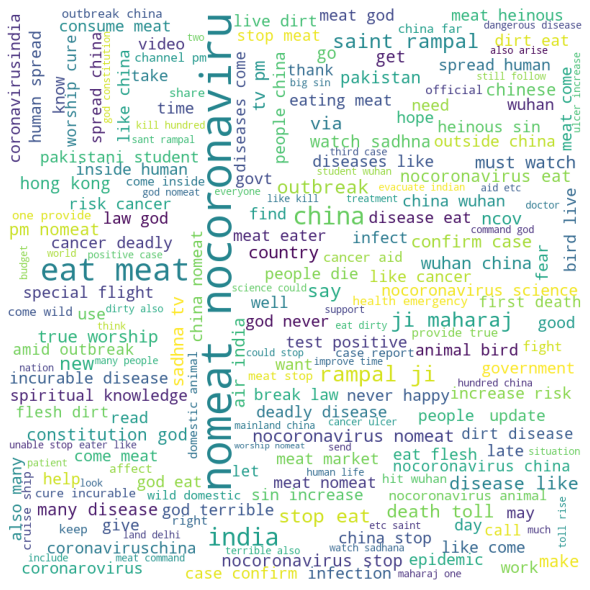

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
f_clean=[]
for l in t_clean:
  s=' '.join(l)
  f_clean.append(s)

In [ ]:
f_clean[:5]

['indian evacuate coronavirus hit wuhan screen delhi airport team doctor suspect infection shift isolation ward base hospital delhi cantonment bhdc chinavirus',
 'coronavirus outbreak air india special flight carry indian wuhan land delhi',
 'everytime abuse deficient service think yes time crisis air india rise occasion gulf war yemen wuhan ai deliver matter',
 'air india special flight evacuate indian citizen china wuhan today wuhan epicentre coronavirus salute pilot crew member doctor paramedical staff board carry operation pray indian citizen',
 'rahul sir coronavirus develop rss laboratory nagpur formula invent gods savarkar back send china instruction modi shah right way tweet sir']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, ngram_range=(2,3),stop_words=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel'])
tf = tf_vectorizer.fit_transform(f_clean)
tf_feature_names = tf_vectorizer.get_feature_names()

In [ ]:
tf_feature_names

['across world',
 'acute disease',
 'afraid request',
 'afraid request renounce',
 'aid cancer',
 'aid cancer way',
 'aid etc',
 'aid etc saint',
 'air india',
 'air india flight',
 'air india special',
 'alcohol etc',
 'alcohol etc like',
 'also arise',
 'also arise improve',
 'also bear',
 'also bear bite',
 'also family',
 'also family see',
 'also many',
 'also many disease',
 'also prohibit',
 'also prohibit meat',
 'amid outbreak',
 'among meat',
 'among meat eater',
 'animal bird',
 'animal bird live',
 'animal kind',
 'animal kind thing',
 'animal kindness',
 'animal kindness environment',
 'animal meat',
 'animal one',
 'animal one never',
 'animal taste',
 'animal taste tongue',
 'arbitrary suffer',
 'arbitrary suffer consequence',
 'arise improve',
 'arise improve time',
 'around world',
 'australia fire',
 'australia fire china',
 'avert spiritual',
 'avert spiritual knowledge',
 'avoid one',
 'avoid one follow',
 'avoid satbhakti',
 'avoid satbhakti necessary',
 'ban meat'

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
  s=''
  for topic_idx, topic in enumerate(model.components_):
    s=s+("Topic %d:" % (topic_idx))
    s=s+(",".join([feature_names[i]
                    for i in topic.argsort()[:-no_top_words - 1:-1]]))
    s=s+'\n'
  return s

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

'Topic 0:nomeat nocoronavirus,eat meat,stop eat,stop eat meat,nocoronavirus stop,nomeat nocoronavirus stop,nocoronavirus stop eat,like china,meat market,heinous sin\nTopic 1:nomeat nocoronavirus,constitution god,spread china,due outbreak,daily thanks,spread country,whole world,china build,face mask,law god\nTopic 2:test positive,first death,outside china,positive case,health emergency,public health,report first,isolation ward,death outside,report first death\nTopic 3:air india,china wuhan,mainland china,third case,hit wuhan,return china,number confirm,china report,land delhi,evacuate indian\nTopic 4:death toll,outbreak china,toll rise,death toll rise,china death,constitution god,live update,human life,outbreak spread,china death toll\nTopic 5:wuhan china,hubei province,world health,declare state,state calamity,special flight,health organization,world health organization,hospital wuhan,wuhan city\nTopic 6:confirm case,amid outbreak,case confirm,case report,people die,pakistani student,s

In [ ]:
lda.perplexity(tf)

264.13492191447415

In [ ]:
f=open('lda_feb_1-5.pk','wb')
import pickle
pickle.dump(lda, f)
f.close()

In [ ]:
f = open("topics_feb_1-5.txt", "w")
f.write(display_topics(lda, tf_feature_names, no_top_words))
f.close()

In [ ]:
import shutil
shutil.move('lda_feb_1-5.pk','/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/saved_models/lda_feb_1-5.pk')
shutil.move("topics_feb_1-5.txt",'/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/topics_text_files/topics_feb_1-5.txt')